# Explorando NLP - 001

Espaço de exploração de códigos para trabalhar com NLP

In [1]:
import pandas as pd

# Tokenização

In [2]:
#df_palavras_input_fp = pd.DataFrame(['amigo', 'amizade', 'estudante', 'esquema','carnaval','carnavalesco', 'cavaleira', 'carreiras', 'tempestade'], columns=['original_fp'])
df_palavras_input_fp = pd.DataFrame(['amigos', 'amigas', 'amizade', 'carreira', 'carreiras', 'tempestade','cavaleira', 'irmão', 'irmã', 'carro', 'carroça'], columns=['original_fp'])
df_palavras_input_fp

,original_fp
0,amigos
1,amigas
2,amizade
3,carreira
4,carreiras
5,tempestade
6,cavaleira
7,irmão
8,irmã
9,carro


## Abordagem NLTK Stemmer

In [4]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\knd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

In [5]:
stemmer = nltk.stem.RSLPStemmer()

In [6]:
df_palavras_input_fp['nltk_stemmer'] = [stemmer.stem(palavra) for palavra in df_palavras_input_fp['original_fp']]
df_palavras_input_fp

,original_fp,nltk_stemmer
0,amigos,amig
1,amigas,amig
2,amizade,amizad
3,carreira,carr
4,carreiras,carr
5,tempestade,tempestad
6,cavaleira,caval
7,irmão,irm
8,irmã,irmã
9,carro,carr


# Abordagem Spacy lemmatization

In [7]:
python -m spacy download pt_core_news_sm

c:\Users\knd\AppData\Local\Programs\Python\Python311\python.exe: No module named spacy


In [11]:
import spacy 
nlp = spacy.load('pt_core_news_sm')

In [ ]:
doc = nlp(str([palavra for palavra in df_palavras_input_fp['original_fp']]))
df_palavras_input_fp['spacy_lemma'] = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
df_palavras_input_fp

,original_fp,nltk_stemmer,spacy_lemma
0,amigos,amig,amigo
1,amigas,amig,amiga
2,amizade,amizad,amizade
3,carreira,carr,carreira
4,carreiras,carr,carreira
5,tempestade,tempestad,tempestade
6,cavaleira,caval,cavaleira
7,irmão,irm,irmão
8,irmã,irmã,irmã
9,carro,carr,carro


# Critérios de semelhança

## Jaccard Similarity

J(A,B)=|A∩B| / |A∪B|

### 1. Subdividir o texto em tokens (Tokenization)

In [13]:
import spacy


sent1 = "Eu quero ter aulas na faculdade aprender e ter aprendizado enquanto posso comprar um carro caro"
sent2 = "Eu quero ir para aula com o carro do meu caro amigo e ver a aula aprender conteúdos felizes que promovam minha aprendizagem"
tokens1 = [t.lower() for t in sent1.split(" ")]
tokens2 = [t.lower() for t in sent2.split(" ")]

In [ ]:
tokens1

['eu',
 'quero',
 'ter',
 'aulas',
 'na',
 'faculdade',
 'aprender',
 'e',
 'ter',
 'aprendizado',
 'enquanto',
 'posso',
 'comprar',
 'um',
 'carro',
 'caro']

In [ ]:
tokens2

['eu',
 'quero',
 'ir',
 'para',
 'aula',
 'com',
 'o',
 'carro',
 'do',
 'meu',
 'caro',
 'amigo',
 'e',
 'ver',
 'a',
 'aula',
 'aprender',
 'conteúdos',
 'felizes',
 'que',
 'promovam',
 'minha',
 'aprendizagem']

### 2. Converter os tokens em sets e compreender união e intersecção


In [ ]:
set1 = set(tokens1)
set2 = set(tokens2)
set_union = set1.union(set2)
set_intersection = set1.intersection(set2)
print(set_intersection)
print(set_union)

{'carro', 'caro', 'aprender', 'eu', 'quero', 'e'}
{'com', 'caro', 'para', 'aprendizado', 'um', 'comprar', 'quero', 'aulas', 'e', 'aula', 'conteúdos', 'a', 'na', 'enquanto', 'aprender', 'posso', 'o', 'do', 'que', 'felizes', 'faculdade', 'minha', 'carro', 'ter', 'ir', 'promovam', 'eu', 'aprendizagem', 'ver', 'meu', 'amigo'}


In [ ]:
print("Jaccard Coefficient (antess do lemma): {}".format( len(set_intersection) / len(set_union)))

Jaccard Coefficient (antess do lemma): 0.1935483870967742


### 4. Melhorias

In [ ]:
#!python -m spacy download pt_core_news_sm

## Teste para compreender o Spacy

In [ ]:
from spacy.lang.pt.examples import sentences 

nlp = spacy.load("pt_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares
Apple PROPN nsubj
está AUX aux
querendo VERB ROOT
comprar VERB xcomp
uma DET det
startup NOUN obj
do ADP case
Reino PROPN nmod
Unido VERB flat:name
por ADP case
100 NUM obl
milhões NUM flat
de ADP case
dólares NOUN nmod


### Função de pre processamento

In [ ]:
# load a spacy model
#nlp_en = spacy.load('en')


#nlp_en = spacy.blank("en")


def preprocess(sentence):
    result = []
    tokens = nlp(sentence)
    for token in tokens:
        # remove determiners and punctuation or spaces 
        if token.pos_ in ['PUNCT','SPACE', 'DET']:
            continue
        else:
            # the lemma of pronouns is stored as '-PRON-' in spacy; we want the actual pronoun
            if token.pos_ == 'PRON':
                result.append(token.text.lower())
            else:
                result.append(token.lemma_)
    return result

print('preprocessed sent1: {}'.format(preprocess("Eu gosto de estudar")))
print('preprocessed sent2: {}'.format(preprocess(sent2)))

preprocessed sent1: ['eu', 'gostar', 'de', 'estudar']
preprocessed sent2: ['eu', 'querer', 'ir', 'para', 'aula', 'com', 'carro', 'de o', 'caro', 'amigo', 'e', 'ver', 'aula', 'aprender', 'conteúdo', 'feliz', 'que', 'promor', 'aprendizagem']


### Redefinir a entrada de texto com Lemma

In [ ]:
lemma_set1 = preprocess(sent1)

lemma_set2 = preprocess(sent2)


In [ ]:
set1_lemma = set(lemma_set1)
set2_lemma = set(lemma_set2)
set_union_lemma = set1.union(set2_lemma)
set_intersection_lemma = set1_lemma.intersection(set2_lemma)

In [ ]:
print("Jaccard Coefficient (depois do lemma): {}".format( len(set_intersection_lemma) / len(set_union_lemma)))

Jaccard Coefficient (depois do lemma): 0.25


# Similaridade de coseno

In [14]:
set1 = set(tokens1)
set2 = set(tokens2)
set_union = set1.union(set2)
set_intersection = set1.intersection(set2)
print(set_intersection)
print(set_union)

{'e', 'carro', 'caro', 'eu', 'aprender', 'quero'}
{'que', 'promovam', 'posso', 'ir', 'aula', 'conteúdos', 'aulas', 'do', 'ver', 'amigo', 'a', 'eu', 'com', 'na', 'e', 'meu', 'carro', 'minha', 'aprendizado', 'aprender', 'quero', 'o', 'ter', 'enquanto', 'aprendizagem', 'caro', 'para', 'faculdade', 'comprar', 'um', 'felizes'}


In [ ]:
set1 = set(tokens1)
set2 = set(tokens2)
set_union = set1.union(set2)
set_intersection = set1.intersection(set2)
print(set_intersection)
print(set_union)

In [ ]:
# import required libraries
import numpy as np
from numpy.linalg import norm
# define two lists or array
A = np.array([2,1,2,3,2,9])
B = np.array([3,4,2,4,5,5])
set_union = set(A).union(set(B))
set_intersection = set(A).intersection(set(B))

 # compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)
print("Jaccard Coefficient: {}".format( len(set_intersection) / len(set_union)))

Cosine Similarity: 0.8188504723485274
Jaccard Coefficient: 0.3333333333333333


### Criar a função

# Gerando uma rede com dados de texto

# Step 1: import Base

In [ ]:
import pandas as pd
raw_data = pd.read_csv('master_pitchfork_lyrics.csv', sep=',')
raw_data.head(1)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,...,artist4,artist5,artist6,artist7,artist_clean,title_clean,raw_text,clean_text,song_count,total_words
0,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,...,NaN,NaN,NaN,NaN,little-simz,stillness-in-wonderland,"b""\n\n[Refrain: Little Simz]\nMentally enslave...",mentally enslaved mentally deranged mental cha...,15,1749


In [ ]:
raw_data.clean_text = raw_data.clean_text.astype('unicode')
raw_data.shape

(1083, 43)

In [ ]:
raw_data.head(1)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,...,artist4,artist5,artist6,artist7,artist_clean,title_clean,raw_text,clean_text,song_count,total_words
0,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,...,NaN,NaN,NaN,NaN,little-simz,stillness-in-wonderland,"b""\n\n[Refrain: Little Simz]\nMentally enslave...",mentally enslaved mentally deranged mental cha...,15,1749


# Step 2: gerar o vetor de palavras

In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
import spacy
# load the pre-trained word vectors
# we use the large one here 
# for more info see:
# https://spacy.io/models/en
nlp = spacy.load('en_core_web_lg')

In [ ]:
%%time
# create an empty list to store the document vectors 
# for each album
doc_vector_list = []
# calculate the average vector per album
# we just want the vector averages, so we
# disable the tagger, parser, and 
# named entity recognition
# (other features available in spaCy)
with nlp.disable_pipes('tagger', 'parser', 'ner'):
    for doc in nlp.pipe(raw_data.clean_text):
        doc_vector = doc.vector
        doc_vector_list.append(doc_vector)
print(len(doc_vector_list))

In [ ]:
len(doc_vector_list)

In [ ]:
%%time
# what words in the albums have / do not have vectors?
# create empty lists to store the 
# words in the vocabulary 
# and those that are out of vocabulary
vocab_list = []
oov_list = []
# loop through the words and store those
# with and without vectors
with nlp.disable_pipes('tagger', 'parser', 'ner'):
    for doc in nlp.pipe(raw_data.clean_text):
        for token in doc:
            if token.is_oov:
                oov_list.append(token.text)
            else:
                vocab_list.append(token.text)

In [ ]:
# how many tokens are out of vocabulary?
# how many tokens have vectors? 
# (e.g. are in the vocabulary)
print(len(oov_list))
print(len(vocab_list))

In [ ]:
# 1.3% of the tokens are out of vocabulary
38533/(38533+2887177)

In [ ]:
list(set(oov_list))[0:5]

In [ ]:
vector_df = pd.DataFrame(doc_vector_list)
vector_df.shape

In [ ]:
vector_df.head()

# *Conexão com OpenAi* 




In [ ]:
openai_key = 'sua chave massa!'

In [ ]:
import openai,os,sys

In [ ]:
#pip install openai

In [ ]:
openai.api_key = openai_key

In [ ]:
#openai.Model.list()

In [ ]:
def pergunta_chatgpt(text):
  openai.api_key = openai_key
  response = openai.Completion.create(
      engine = "text-davinci-003",
      prompt = text,
      temperature = 0.6, # Manage creativity [0-1]
      max_tokens = 200,
  )
  return print(response.choices[0].text)

In [ ]:
# def main():
#   while True:
#     print('GPT: faça uma pergunta\n')
#     myQn = input()
#     pergunta_chatgpt(myQn)
#     print('\n')

# main()

# Análise de sentimento

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
import seaborn as sns

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV
nltk.download('punkt')
data = pd.read_csv("train.csv")
#data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Início da Limpeza dos dados

In [ ]:
nltk.download('stopwords')

stemmer = nltk.SnowballStemmer("english")

from nltk.corpus import stopwords

import string
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["text"] = data["text"].apply(clean)

# Primeira visualização

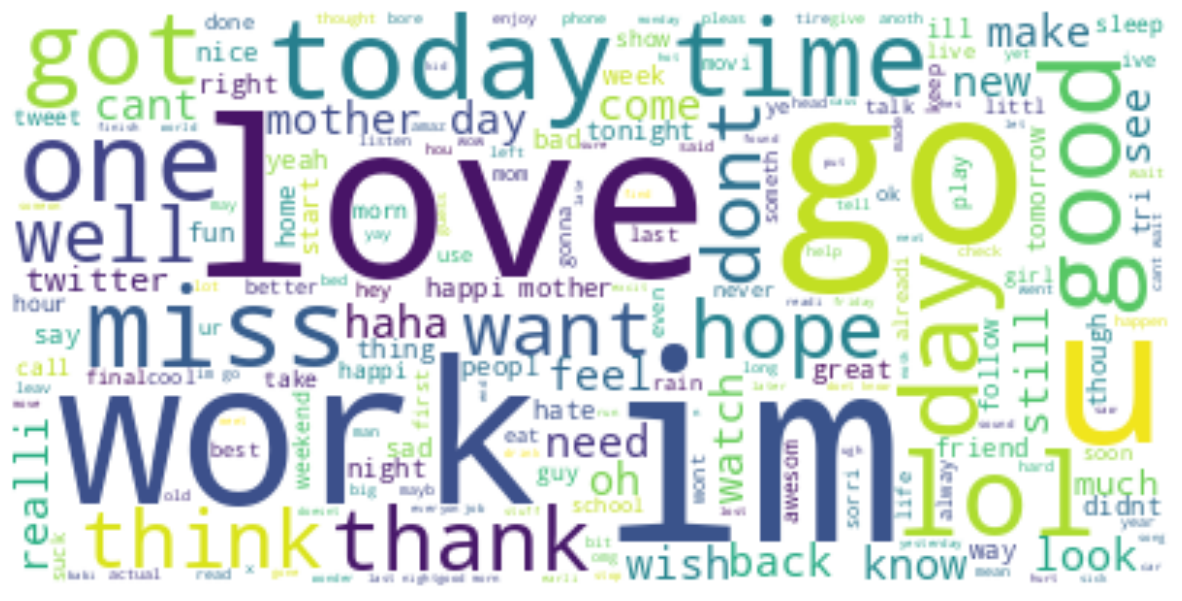

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

text = " ".join(i for i in data.text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Definição de sentimento com biblioteca do NLTK

In [ ]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

# sentiments = SentimentIntensityAnalyzer()

# data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
# data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
# data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

In [ ]:
data = data[["text", "Positive", 
             "Negative", "Neutral"]]
print(data.head())

                                      text  Positive  Negative  Neutral
0                            id respond go       0.0      0.00     1.00
1                  sooo sad miss san diego       0.0      0.61     0.39
2                               boss bulli       0.0      0.00     1.00
3                      interview leav alon       0.0      0.00     1.00
4   son  couldnt put releas alreadi bought       0.0      0.00     1.00


# verificar predominância

In [ ]:
x=data['sentiment'].value_counts()
print(x)


neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


# Cross Validation para NLP classificadora

In [ ]:
# test = pd.read_csv("test.csv")
data.head(3)

,text,Positive,Negative,Neutral
0,id respond go,0.0,0.00,1.00
1,sooo sad miss san diego,0.0,0.61,0.39
2,boss bulli,0.0,0.00,1.00


# random split train and test data

In [ ]:
# random split train and test data
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

print(len(train), len(test), len(test)/len(train))

21861 5620 0.257078816156626


In [ ]:
#Teste para verificar se existe algum id de treino na base de teste

teste = train.merge(test, left_on='textID', right_on='textID')
teste.head()

,textID,text_x,selected_text_x,sentiment_x,random_number_x,text_y,selected_text_y,sentiment_y,random_number_y


# Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = ["Hello my name is joao","joao this is my python notebook","joao trying to create a big dataset","joao of words to try differnt","features of count vectorizer"]

coun_vect = CountVectorizer(lowercase=False)
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
print(df)

   Hello  big  count  create  dataset  differnt  features  is  joao  my  name  \
0      1    0      0       0        0         0         0   1     1   1     1   
1      0    0      0       0        0         0         0   1     1   1     0   
2      0    1      0       1        1         0         0   0     1   0     0   
3      0    0      0       0        0         1         0   0     1   0     0   
4      0    0      1       0        0         0         1   0     0   0     0   

   notebook  of  python  this  to  try  trying  vectorizer  words  
0         0   0       0     0   0    0       0           0      0  
1         1   0       1     1   0    0       0           0      0  
2         0   0       0     0   1    0       1           0      0  
3         0   1       0     0   1    1       0           0      1  
4         0   1       0     0   0    0       0           1      0  


In [ ]:
print(coun_vect.vocabulary_)

{'Hello': 0, 'my': 9, 'name': 10, 'is': 7, 'joao': 8, 'this': 14, 'python': 13, 'notebook': 11, 'trying': 17, 'to': 15, 'create': 3, 'big': 1, 'dataset': 4, 'of': 12, 'words': 19, 'try': 16, 'differnt': 5, 'features': 6, 'count': 2, 'vectorizer': 18}


# SKlearn Vectorizer

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

# 1º modelo: Regressão Logística (multi classes)

In [ ]:
#data = pd.read_csv("train.csv")

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
lr.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 965,  341,   90],
       [ 530, 1673,  444],
       [ 115,  293, 1303]])

<Axes: >

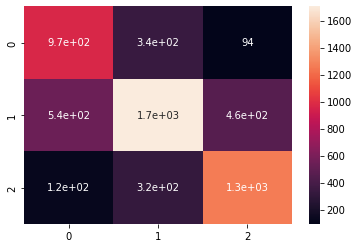

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(predictions,y_test), annot=True)

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.61      0.72      0.66      1395
     neutral       0.73      0.63      0.67      2666
    positive       0.70      0.75      0.73      1688

    accuracy                           0.69      5749
   macro avg       0.68      0.70      0.69      5749
weighted avg       0.69      0.69      0.69      5749



# 2º modelo: Xgboost Classificador (multi classes)

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [ ]:
#y_train

In [ ]:
y_train_xgb = y_train.replace({'negative': 0, 'neutral': 1,'positive':2})
y_test_xgb = y_test.replace({'negative': 0, 'neutral': 1,'positive':2})

In [ ]:
#y_train_xgb.info()

In [ ]:
# Fit
xgb_cl.fit(X_train, y_train_xgb)

# Predict
predictions = xgb_cl.predict(X_test)

In [ ]:
print(classification_report(predictions,y_test_xgb))

              precision    recall  f1-score   support

           0       0.55      0.78      0.64      1156
           1       0.80      0.63      0.70      2916
           2       0.72      0.77      0.74      1677

    accuracy                           0.70      5749
   macro avg       0.69      0.73      0.70      5749
weighted avg       0.72      0.70      0.70      5749



In [ ]:
xgbparameters_v2 = {'objective': ['binary:logistic'], #, 'count:poisson'
                    'base_score': [0.3,0.4,0.5], #0.2,0.3,0.4, 0.5, 0.6
                 'learning_rate': [0.01, .02, ],#.05, .07
                 'max_depth': [1,2],#6, 7 #
                 'min_child_weight' :[0.5,1],
                 'reg_alpha': [0.0025, 0.005], #'n_estimators': [80, 100], #,120 , 250 # # 0.2, 0.5
                 
                 
                 'reg_lambda': [0.0025, 0.005], #,0.2, 0.5
                 'verbosity': [1]}

xgb_CL_grid = GridSearchCV(xgb_cl,
                       xgbparameters_v2,
                       cv=2,#cv
                       n_jobs=-1,
                       verbose=True)

xgb_CL_grid.fit(X_train,y_train_xgb)

param_grid = xgb_CL_grid.best_params_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


In [ ]:
predictions = xgb_CL_grid.predict(X_test)
print(classification_report(predictions,y_test_xgb))

              precision    recall  f1-score   support

           0       0.24      0.80      0.37       501
           1       0.90      0.48      0.63      4243
           2       0.43      0.78      0.56      1005

    accuracy                           0.56      5749
   macro avg       0.52      0.69      0.52      5749
weighted avg       0.76      0.56      0.59      5749



In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
# #import transformers
modelo = xgb_cl
explainer = shap.TreeExplainer(modelo)

#shap.initjs()
shap_values = explainer.shap_values(X_train, approximate=True, check_additivity=False)





# # load a transformers pipeline model
# #model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# model = xgb_cl

# # explain the model on two sample inputs
# explainer = shap.Explainer(model) 
# shap_values = explainer(X_train)

# # visualize the first prediction's explanation for the POSITIVE output class
# shap.plots.text(shap_values[0, :, 1])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values,X_train)

In [ ]:


import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 2it [00:34, 34.50s/it]               


# 3º modelo: Random Forest Classificador (multi classes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
Rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
predictions = Rfc.predict(X_test)

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       1.00      0.40      0.57      5745
    positive       0.00      1.00      0.00         4

    accuracy                           0.40      5749
   macro avg       0.33      0.47      0.19      5749
weighted avg       1.00      0.40      0.57      5749



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GridSearch

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=Rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, y_train)

In [ ]:
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
predictions = CV_rfc.predict(X_test)

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       1.00      0.41      0.58      5755
    positive       0.02      0.91      0.04        44

    accuracy                           0.41      5799
   macro avg       0.34      0.44      0.21      5799
weighted avg       0.99      0.41      0.58      5799



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Aprofundamento em modelos





In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
# Diferenciar negativo de positivo
analise = ['negative','positive']

data= data.loc[data['sentiment'].isin(analise)]
data.head(1)

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative


In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

text = " ".join(i for i in data.text)

#stopwords = set(STOPWORDS)
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Limpeza de texto

In [ ]:
def clean(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["text"] = data["text"].apply(clean)

# Split Treino e Teste

In [ ]:
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

## Vetorização

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

# Definição do modelo de classificação

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

## Renomear treino e teste

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

## Adaptação sintaxe de (variável dependente) Xgboost

In [ ]:
y_train = y_train.replace({'negative': 0, 'neutral': 2,'positive':1})
y_test = y_test.replace({'negative': 0, 'neutral': 2,'positive':1})

## Fit modelo ao treino e teste

In [ ]:
# Fit
xgb_cl.fit(X_train, y_train)

# Predict
predictions = xgb_cl.predict(X_test)

# Função de análise de threshold 

In [ ]:
def AvaliacaoPrecisao(modelo, testeX, testeY, step=0.01):
    # Predição para dados de teste
    testeY_prob = modelo.predict_proba(testeX)[:, 1] 
    
    # Limiares 
    threshold = np.arange(0.01, 1, step)    
    # tp = [] # Verdadeiros Positivos
    pr = []  # Precisão
    
    for th in tqdm(threshold):
        # Classificação registros com prob >= threshold
        predictY = (testeY_prob >= th)
        # tp.append(confusion_matrix(testeY, predictY).ravel()[3])
        pr.append(precision_score(testeY, predictY, average='micro'))

    max_pr = max(pr)
    th = threshold[pr.index(max_pr)]
    predictY = (testeY_prob >= th)
    conf_mat = confusion_matrix(y_target = y_teste,y_predicted = predictY, binary=False)

    print('Threshold: %.4g' % th)
    print('Precisão teste: %.2f%%' % (max_pr * 100))
    print('Matriz de Confusão:')
    print(conf_mat)
    
    fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
    plt.show()


# Obter probabilidade de score

In [ ]:
#testeY_prob = modelo.predict_proba(X_teste)[:, 1]

testeY_prob =  xgb_cl.predict_proba(X_test)[:, 1]
y_teste = y_test

In [ ]:
# Limiares de cada faixa de risco 
threshold = [0.800,0.750, 0.700,0.650, 0.600, 0.550, 0.500, 0.450, 0.400]
#,0.650, 0.600, 0.500

index = 0
resultado = pd.DataFrame([])
for th in threshold:
    index += 1
    # Classificação registros com prob >= threshold
    predictY = (testeY_prob >= th).astype('int')
        
    # Matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_teste, predictY).ravel()
    
    df_aux = pd.DataFrame({
        'FAIXA': [index],
        'Threshold': [th],
        'PRECISÃO': [(tp/(tp + fp) * 100).round(2)], 
        'Sentimentos Marcados': [tp + fp],
        'Erros': [fp],
        'Acertos': [tp],
        'Recall': [(tp/(tp + fn) * 100).round(2)]})
    
    resultado = resultado.append(df_aux)
    
    
resultado

<ipython-input-26-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-26-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-26-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-26-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-26-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,FAIXA,Threshold,PRECISÃO,Sentimentos Marcados,Erros,Acertos,Recall
0,1,0.80,96.61,1061,36,1025,57.20
0,2,0.75,95.18,1223,59,1164,64.96
0,3,0.70,94.69,1299,69,1230,68.64
0,4,0.65,93.67,1390,88,1302,72.66
0,5,0.60,92.93,1456,103,1353,75.50
0,6,0.55,92.45,1524,115,1409,78.63
0,7,0.50,90.80,1597,147,1450,80.92
0,8,0.45,88.75,1698,191,1507,84.10
0,9,0.40,79.09,2114,442,1672,93.30


# Com grid Search

In [ ]:
xgbparameters_v2 = {'objective': ['binary:logistic'], #, 'count:poisson'
                    'base_score': [0.3,0.4,0.5, 0.6], #0.2,0.3,0.4, 0.5, 0.6
                 'learning_rate': [0.01, .02, ],#.05, .07
                 'max_depth': [1,2],#6, 7 #
                 'min_child_weight' :[0.5,1],
                 'reg_alpha': [0.0025, 0.005], #'n_estimators': [80, 100], #,120 , 250 # # 0.2, 0.5
                 
                 
                 'reg_lambda': [0.0025, 0.005], #,0.2, 0.5
                 'verbosity': [1]}

xgb_CL_grid = GridSearchCV(xgb_cl,
                       xgbparameters_v2,
                       cv=2,#cv
                       n_jobs=-1,
                       verbose=True)

xgb_CL_grid.fit(X_train, y_train)

param_grid = xgb_CL_grid.best_params_

Fitting 2 folds for each of 128 candidates, totalling 256 fits


In [ ]:
testeY_prob =  xgb_CL_grid.predict_proba(X_test)[:, 1]
y_teste = y_test

In [ ]:
# Limiares de cada faixa de risco 
threshold = [0.800,0.750, 0.700,0.650, 0.600, 0.550, 0.500, 0.450, 0.400]
#,0.650, 0.600, 0.500

index = 0
resultado = pd.DataFrame([])
for th in threshold:
    index += 1
    # Classificação registros com prob >= threshold
    predictY = (testeY_prob >= th).astype('int')
        
    # Matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_teste, predictY).ravel()
    
    df_aux = pd.DataFrame({
        'FAIXA': [index],
        'Threshold': [th],
        'PRECISÃO': [(tp/(tp + fp) * 100).round(2)], 
        'Sentimentos Marcados': [tp + fp],
        'Erros': [fp],
        'Acertos': [tp],
        'Recall': [(tp/(tp + fn) * 100).round(2)]})
    
    resultado = resultado.append(df_aux)
    
    
resultado

<ipython-input-30-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-30-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-30-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-30-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append(df_aux)
<ipython-input-30-6055baefabb2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,FAIXA,Threshold,PRECISÃO,Sentimentos Marcados,Erros,Acertos,Recall
0,1,0.80,100.00,57,0,57,3.18
0,2,0.75,96.51,258,9,249,13.90
0,3,0.70,95.81,525,22,503,28.07
0,4,0.65,95.76,542,23,519,28.96
0,5,0.60,92.48,758,57,701,39.12
0,6,0.55,91.80,829,68,761,42.47
0,7,0.50,91.46,1007,86,921,51.40
0,8,0.45,57.95,3068,1290,1778,99.22
0,9,0.40,55.49,3217,1432,1785,99.61


# Fim!


In [ ]:
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in data]  
X_test_tok= [nltk.word_tokenize(i) for i in test]

In [ ]:
X_train = data.copy()
X_test = test.copy()

In [ ]:
X_train.head()

,textID,text,selected_text,sentiment,Positive,Negative,Neutral,word_count
0,cb774db0d1,id respond go,"I`d have responded, if I were going",neutral,0.0,0.00,1.00,3
1,549e992a42,sooo sad miss san diego,Sooo SAD,negative,0.0,0.61,0.39,5
2,088c60f138,boss bulli,bullying me,negative,0.0,0.00,1.00,2
3,9642c003ef,interview leav alon,leave me alone,negative,0.0,0.00,1.00,3
4,358bd9e861,son couldnt put relea alreadi bought,"Sons of ****,",negative,0.0,0.00,1.00,6


In [ ]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)
#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
def fit(self, X, y):
        return self
def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

model = gensim.models.Word2Vec(X_train)
#w2v = dict(zip(model.wv.index2word,model.wv.index2word))
#model.wv.index2word

#df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']]

model = Word2Vec(X_train['text'],min_count=1)     
#modelw = MeanEmbeddingVectorizer(w2v)
# converting text to numerical data using Word2Vec
X_train_vectors_w2v = model.transform(X_train_tok)
X_val_vectors_w2v = model.transform(X_test_tok)

AttributeError: ignored

https://www.kaggle.com/code/chandradipbanerjee/tweet-sentiment-analysis-by-chandradip-banerjee/notebook